**Importing libraries**

In [ ]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
import os
import json
from zipfile import ZipFile

In [ ]:
kaggle_credentials=json.load(open("kaggle.json"))

In [ ]:
os.environ["KAGGLE_USERNAME"]=kaggle_credentials["username"]
os.environ["KAGGLE_KEY"]=kaggle_credentials["key"]

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
 99% 2.68G/2.70G [00:33<00:00, 173MB/s]
100% 2.70G/2.70G [00:33<00:00, 86.1MB/s]


In [ ]:
with ZipFile("new-plant-diseases-dataset.zip","r") as zip_ref:
  zip_ref.extractall()

**Loading Model**

In [ ]:
model= tf.keras.models.load_model('NEW_CROP_DISEASE_DETECTION_MODEL.h5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

**Visualizing single image of test set**

In [ ]:
!pip install opencv-python

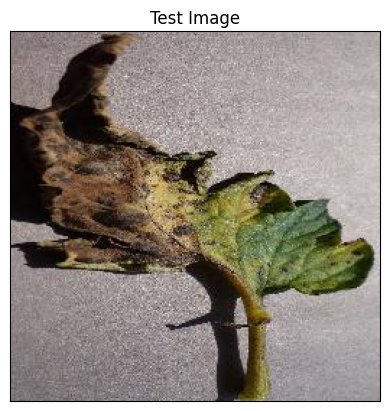

In [ ]:
#Test Image Visualization
import cv2
image_path ="test_image_path"
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

**Testing Model**

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
print(input_arr.shape)

(1, 128, 128, 3)


In [ ]:
predictions = model.predict(input_arr)
predictions,predictions.shape

1/1 [==============================] - 0s 57ms/step


(array([[3.71428323e-05, 2.18605328e-06, 5.42183057e-04, 8.61719382e-05,
         6.11307269e-06, 4.57467213e-05, 1.04847131e-05, 4.98956128e-04,
         4.27452460e-06, 2.93669768e-06, 7.50406002e-07, 1.03884190e-03,
         6.47139153e-04, 1.18123531e-01, 1.67427843e-05, 1.13305505e-05,
         6.56042466e-05, 3.88932358e-06, 1.20516204e-04, 5.66350318e-05,
         6.82891550e-05, 1.22533893e-04, 9.15720448e-05, 1.99387541e-05,
         1.45191634e-05, 4.04895145e-05, 1.04945553e-02, 1.35630717e-06,
         2.60811625e-03, 1.87678754e-01, 2.57018268e-01, 1.22529990e-03,
         4.16257441e-01, 1.36963499e-03, 2.98440253e-04, 2.54343846e-04,
         1.07046368e-03, 4.48078063e-05]], dtype=float32),
 (1, 38))

In [ ]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

32


In [ ]:
class_name=['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

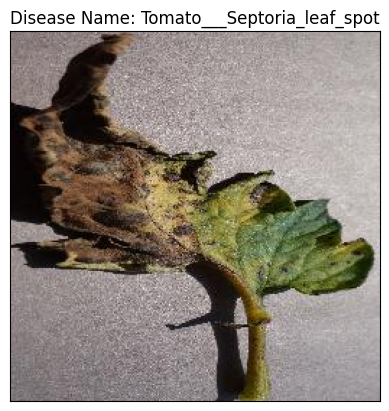

In [ ]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
!cp -r "/content/test" "/content/drive/MyDrive"